# Problem Set 4

**Context:** Consider the tutorial dataset [Visualizing statistical estimates and fits](https://github.com/simoneSantoni/data-viz-smm635/blob/master/tutorials/statisticalEstimates/_0.ipynb),
which concerns the a moderated regression analysis.

**Task**: Create **ONE** Matplotlib figure that illustrates the effect of job  
*satisfaction on turnover intent as contingent on firm size. The figure should  
*contain a maximum of two plots (i.e., ax0 and ax1); a figure with one plot  
*could do the job too. The audience is made-up of HR specialists.

**Submission**: Submit your solution via email to simone.santoni.1@city.ac.uk.
Late submissions (> November 18, 2020) may not be considered for the in-class
presentations.



# Visualizing statistical estimates and fits (Tutorial)

This tutorial shows how to visualize interaction effects included in regression
models such as:

\begin{equation}
  y = \alpha + \beta * x + \gamma * z + \delta * x * z + \epsilon
\end{equation}

Mainly, we use interaction terms to take into account that the effect of the  
independent variable $x$ on the outcome $y$ is contingent on the value of a 
third variable $z$.

Examples:

+   the economic value of patents is contingent on the intellectual property
    regime of a country/set of countries
+   the economic returns of schooling are contingent on the institutional and
    cultural environment of a country
+   the social influence of a Soundcloud user's suggestions/reposts is contingent 
    on followership
+   the influence of job satisfaction on intent to quit is contingent on the 
    size of the employer 

# Setup

## Import relevant libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import statsmodels.formula.api as smf
import pandas as pd

## Viz options

In [2]:
rc('font',**{'family':'serif','serif':['Helvetica']})
rc('text', usetex=True)

plt.style.use('fivethirtyeight')

# Application

## Goal

The working hypothesis is that lower levels of job satisfaction ($x$) increases the
chances of turnover, i.e., intent to quit ($y$).

On top of this, we think the negative relationship between  $x$ and $y$ depends
on the size of the employer. The intuition is that large employers have an 
internal labor market that allows individuals to change job positions (get a
better fit with the task) without quitting the employment relation.

The **goal** is showing how the relationship between job satisfaction and 
intent to quit (as estimated via OLS) changes as firm size increases.

## Data simulation

We simulate multiple datasets involving the following variables:

+   job satisfaction - the extent to which an employee is happy with his/her job
    (let's assume we have Likert scale data; legend: 1 = not at all, 5 = to a 
    great extent)
+   intent to quit - the extent to which an employee considers the possibility 
    to quit the current job (let's assume we have Likert scale data; legend: 1 
    = not at all, 5 = to a great extent)
+   age (in years)
+   organizational tenure (years spent working for the employer)
   
Let's assume that all variables have been transformed into z-scores.
   
Each dataset we simulate reflect the following cohorts of employers:

+   micro firms: 1 - 5 employees
+   small firms: 6 - 25 employees
+   medium firms: 26 - 100 employees
+   large firms: 100 - 500 employees
+   very large firms: 500 + 

In [3]:
# set seed
np.random.seed(777)

# sample size
num_samples = 1000

# variables' mean 
mu = np.repeat(0, 4)

# names
names = ['job_sat', 'int_qui', 'age', 'org_tnr']

### Micro firms

In [4]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.40, -0.03,  0.11],
        [ -0.40,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_1_5 = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                      columns=names)

# expand
df_1_5.loc[:, 'cohort'] = 'micro'
df_1_5.loc[:, 'firm_size'] = np.random.randint(low=1, high=5, size=num_samples)

In [5]:
df_1_5.head()

,job_sat,int_qui,age,org_tnr,cohort,firm_size
0,-0.180922,-0.712431,0.709782,0.523985,micro,3
1,-1.351227,0.168387,-1.268555,0.039751,micro,1
2,2.613672,-0.345493,-0.786313,0.555096,micro,4
3,0.067424,-0.967287,1.520426,0.433870,micro,2
4,0.967771,-0.598167,0.088768,1.385375,micro,4


### Small firms

In [6]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.30, -0.03,  0.11],
        [ -0.30,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_6_25 = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                       columns=names)

# expand
df_6_25.loc[:, 'cohort'] = 'small'
df_6_25.loc[:, 'firm_size'] = np.random.randint(low=6,
                                                high=25,
                                                size=num_samples)

In [7]:
df_6_25.head()

,job_sat,int_qui,age,org_tnr,cohort,firm_size
0,0.021162,0.331526,-0.885398,-1.428262,small,23
1,-0.824271,1.526203,1.335122,0.015598,small,11
2,1.251447,-1.406453,-0.036737,-0.883240,small,21
3,-0.316772,0.939712,0.253895,1.255965,small,15
4,-0.639822,0.215544,-0.434678,0.672885,small,15


### Medium firms

In [8]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.25, -0.03,  0.11],
        [ -0.25,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_26_100 = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                         columns=names)

# expand
df_26_100.loc[:, 'cohort'] = 'medium'
df_26_100.loc[:, 'firm_size'] = np.random.randint(low=26,
                                                  high=100,
                                                  size=num_samples)

### Large firms

In [9]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.20, -0.03,  0.11],
        [ -0.20,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_101_500 = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                          columns=names)

# expand
df_101_500.loc[:, 'cohort'] = 'large'
df_101_500.loc[:, 'firm_size'] = np.random.randint(low=101, high=500,
                                                size=num_samples)

### Very large firms

In [10]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.15, -0.03,  0.11],
        [ -0.15,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_501_ = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                       columns=names)

# expand
df_501_.loc[:, 'cohort'] = 'verylarge'
df_501_.loc[:, 'firm_size'] = np.random.randint(low=501, high=2000,
                                                size=num_samples)

# Data preparation

In [11]:
df = pd.concat([df_1_5, df_6_25, df_26_100, df_101_500, df_501_],
               axis=0)

# select only necessary columns
df = df[['job_sat', 'int_qui', 'firm_size', 'cohort']]

df = df.reset_index().drop(columns = 'index')

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   job_sat    5000 non-null   float64
 1   int_qui    5000 non-null   float64
 2   firm_size  5000 non-null   int64  
 3   cohort     5000 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 156.4+ KB


,job_sat,int_qui,firm_size,cohort
0,-0.180922,-0.712431,3,micro
1,-1.351227,0.168387,1,micro
2,2.613672,-0.345493,4,micro
3,0.067424,-0.967287,2,micro
4,0.967771,-0.598167,4,micro


# Regression analysis

There are two alternatives to carry out the regression analysis of intention to quit on job satisfaction as contingent on firm size:

+ Alternative 1: producing 5 models, each of which applies to a certain cohort of firms. This will generate the following key estimates:
  - 5 slopes relating job satisfaction to intention to quit [$\beta_{micro}$, $\beta_{small}$, ..... ]
  - no $\delta$ / no interaction effect
+ Alternative 2: producing one model that operationalizes the equation reported in the very first cell of this notebook. This will generate the following key estimates:
  - $\beta$: the effect of job satisfaction that does not depend on firm size
  - $\delta$: the effect of job satisfaction that depends (i.e., it is contingent) on firm size

In [12]:
# fit models and get necessary coefficients
for cohort in df.cohort.unique():
    
    var_name = '_'.join(['lm', cohort])
    
    # fit the model
    lm = smf.ols('int_qui ~ job_sat', data = df[df['cohort'] == cohort]).fit()
    
    # create a variable containing the model
    vars()[var_name] = lm
    print('A variable `{}` was created!'.format(var_name))
    
    # get confidence intervals
    estimates = vars()[var_name].conf_int(alpha = 0.05)

    # reindex data
    estimates.reset_index(inplace=True)

    # rename columns
    estimates.rename(columns={'index': 'variable',
                              0: 'lower_bound',
                              1: 'upper_bound'}, inplace=True)

    # recall and attach betas
    estimates.loc[:, 'beta'] = list(vars()[var_name].params)

    # reindex data
    estimates.set_index('variable', inplace=True)
    
    # create a variable containing the estimates
    var_name = '_'.join(['estimates', cohort])
    vars()[var_name] = estimates
    print('A variable `{}` was created!'.format(var_name))


A variable `lm_micro` was created!
A variable `estimates_micro` was created!
A variable `lm_small` was created!
A variable `estimates_small` was created!
A variable `lm_medium` was created!
A variable `estimates_medium` was created!
A variable `lm_large` was created!
A variable `estimates_large` was created!
A variable `lm_verylarge` was created!
A variable `estimates_verylarge` was created!


In [13]:
# sample model summary
print(lm_micro.summary())

                            OLS Regression Results                            
Dep. Variable:                int_qui   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     187.5
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           3.13e-39
Time:                        16:58:30   Log-Likelihood:                -1333.8
No. Observations:                1000   AIC:                             2672.
Df Residuals:                     998   BIC:                             2681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0002      0.029     -0.005      0.9

In [14]:
# sample estimates
estimates_micro

,lower_bound,upper_bound,beta
variable,,,
Intercept,-0.057214,0.056910,-0.000152
job_sat,-0.462358,-0.346441,-0.404399


# Visualization

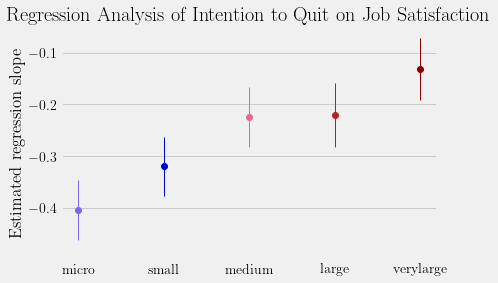

In [15]:
# create figure 
fig = plt.figure(figsize=(6, 4))

# add plot
ax = fig.add_subplot(1, 1, 1)

colors = ['mediumslateblue', 'mediumblue', 'palevioletred', 'firebrick', 'darkred']

for i, cohort in enumerate(df.cohort.unique()):
    
    var_name = '_'.join(['estimates', cohort])
    
    # focal variable
    pred = vars()[var_name].index[1:]

    # data series
    x = i
    y = vars()[var_name].loc[pred, 'beta']
    y_high = vars()[var_name].loc[pred, 'upper_bound']
    y_low = vars()[var_name].loc[pred, 'lower_bound']

    # plot data
    ax.errorbar(x, y, fmt='o',
                yerr=np.absolute(y_low - y_high)/2,
                elinewidth=1,
                markerfacecolor = colors[i],
                markeredgecolor = colors[i],
                ecolor = colors[i]
                )    

# set ticks and title

ax.set_ylim(-0.5, -0.05)
ax.set_xticks(np.arange(len(df.cohort.unique())))
ax.set_xticklabels(df.cohort.unique())
ax.set_yticks(np.arange(-0.4, -0.1, 0.1))
ax.set_ylabel('Estimated regression slope')
ax.set_title('Regression Analysis of Intention to Quit on Job Satisfaction')

# remove grid
ax.grid(axis='x')

plt.show()